# Bibliographic citation analysis
Data sources: medpub about deep in the brain theme related literature on https://pubmed.ncbi.nlm.nih.gov/?term=deep+brain&filter=years.1975-2023&size=100.

Use the database api in opencitations to fetch information about references in the relevant literature.

The authors cited, the number of citations, and the authors' partnerships were further analyzed.

In [4]:
import requests
import json

API_URL = "https://opencitations.net/index/poci/api/v1/references/{}"
HTTP_HEADERS = {"authorization": "fea0f56f-741a-4e35-8ead-ee62a194ae73"}

def get_references_from_poci(pmid):
    response = requests.get(API_URL.format(pmid), headers=HTTP_HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for PMID: {pmid}")
        return None

# 从文件中读取PMID列表
with open("E:/Chrome download/pmid-deepbrain-set.txt", 'r') as file:
    pmid_list = [pmid.strip() for pmid in file.readlines()]

citation_data = {}
for pmid in pmid_list:
    references = get_references_from_poci(pmid)
    if references:
        citation_data[pmid] = references

# 将引文数据保存到文件中
with open("citation_data.json", 'w') as file:
    json.dump(citation_data, file, indent=4)

print("Citation data has been saved to 'citation_data.json'")



Citation data has been saved to 'citation_data.json'


In [10]:
import json

with open("citation_data.json", "r", encoding="utf-8") as file:
    citation_data = json.load(file)

print(f"Keys in the dictionary: {list(citation_data.keys())}")
key_sample = list(citation_data.keys())[0]
print(f"\nValue for key '{key_sample}':")
print(citation_data[key_sample])


Keys in the dictionary: ['30606613', '24112882', '32161395', '18826348', '18394572', '32325058', '19575509', '31568895', '19749225', '17015236', '35853320', '21674623', '34999162', '21748713', '34082280', '33328900', '16636228', '24112886', '21039946', '28601961', '26737080', '32341543', '35177547', '34919630', '32906089', '18590380', '31512018', '29653910', '31209253', '21699483', '32890745', '33259847', '35964970', '33305486', '36273090', '19426730', '30369441', '30529072', '36086324', '28530229', '18431055', '33199854', '28220987', '27181686', '26554044', '24112887', '21466694', '36027661', '34694282', '34210163', '32389928', '32719359', '32603860', '34892099', '36086465', '24154600', '31504849', '31710771', '30884313', '31265251', '33623134', '30604680', '34023395', '6504279', '26737881', '30818131', '26544769', '34558012', '19549821', '30926457', '22237006', '29205152', '20849960', '30646850', '28729926', '36055050', '6279945', '31519412', '32716751', '25890141', '18985299', '8498

## The most cited author

In [58]:
pmid_citation_counts = defaultdict(int)
for citing_pmid, citations in citation_data.items():
    for citation in citations:
        cited_pmid = citation['cited'].split(":")[1]
        pmid_citation_counts[cited_pmid] += 1


sorted_citations = sorted(pmid_citation_counts.items(), key=lambda x: x[1], reverse=True)
for pmid, count in sorted_citations[:10]:
    print(f"PMID: {pmid} has been cited {count} times.")


PMID: 15748841 has been cited 9 times.
PMID: 26017442 has been cited 6 times.
PMID: 1671433 has been cited 5 times.
PMID: 16781988 has been cited 5 times.
PMID: 16943402 has been cited 5 times.
PMID: 16145540 has been cited 5 times.
PMID: 16636237 has been cited 5 times.
PMID: 22743772 has been cited 4 times.
PMID: 14614167 has been cited 4 times.
PMID: 15824252 has been cited 4 times.


### The most cited paper is Deep brain stimulation for treatment-resistant depression, By Helen S Mayberg 1, Andres M Lozano, Valerie Voon, Heather E McNeely, David Seminowicz, Clement Hamani, Jason M Schwalb, Sidney H Kennedy

## Citation network analysis

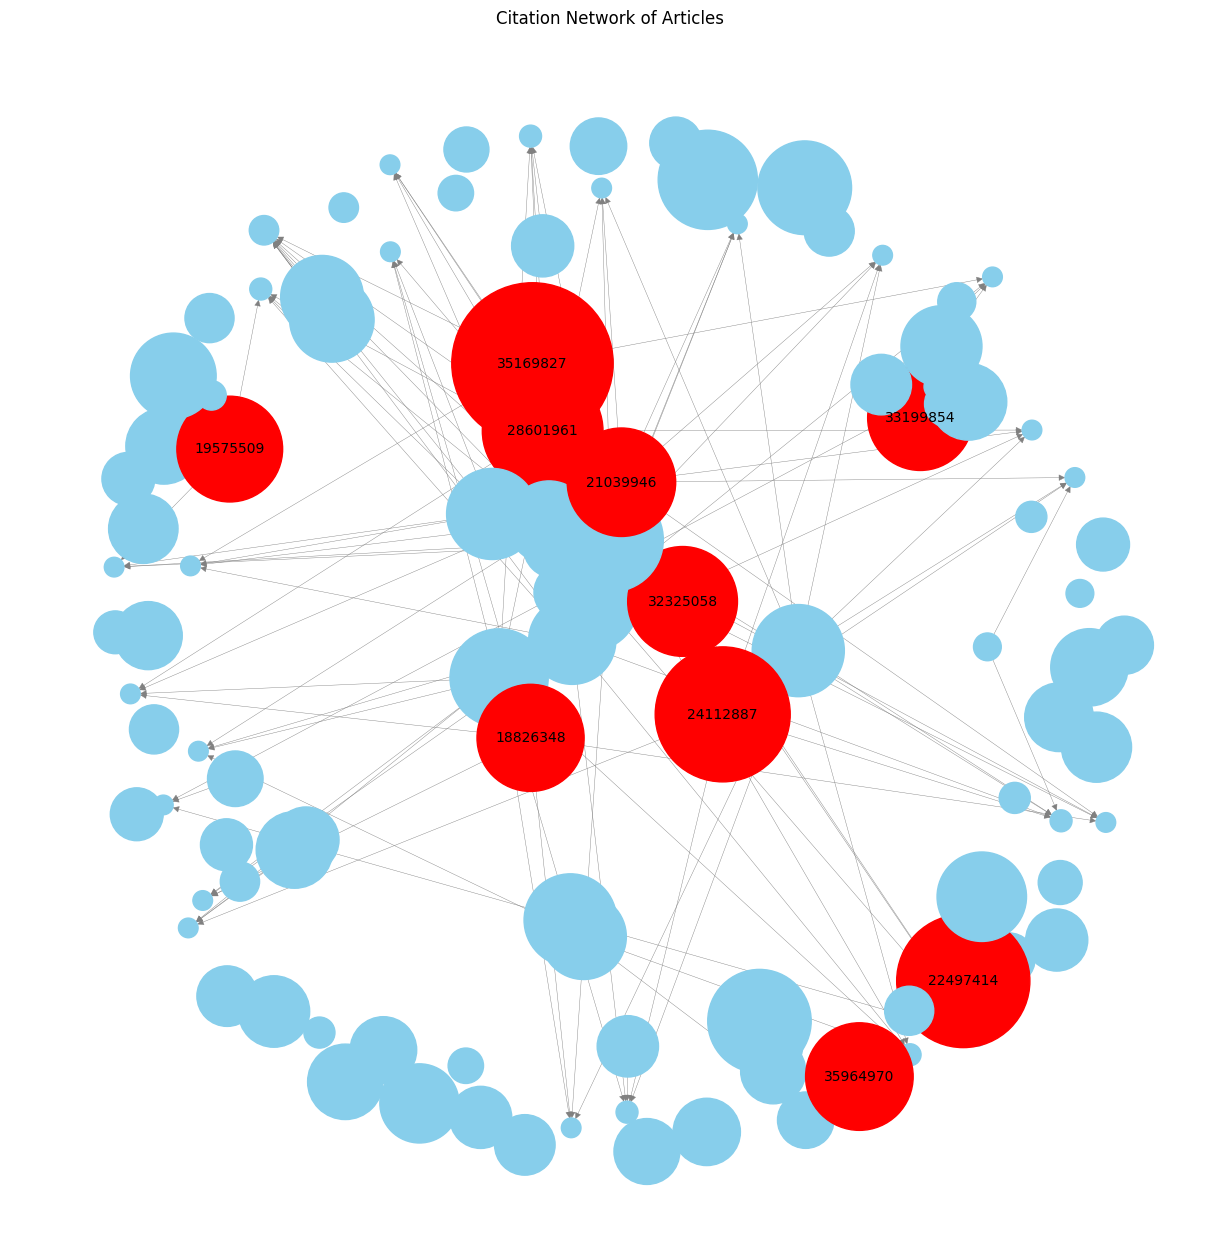

In [41]:
# Create an undirected graph
G = nx.DiGraph()
# edging
for citing, citations in citation_data.items():
    for entry in citations:
        G.add_edge(citing, entry['cited'])

# 3. Calculate the degree of each node (number of citations + number of citations to other articles)
degrees = G.degree()

# 4. Define a threshold and display only nodes whose degree exceeds this threshold
threshold = 3 
sub_nodes = [node for node, degree in degrees if degree > threshold]

# 5. Create subgraph
sub_G = G.subgraph(sub_nodes)

# 6. Define layout
pos = nx.spring_layout(sub_G)

# 7. Find the top 10 nodes with the highest degrees
top_nodes = [node[0] for node in sorted(degrees, key=lambda x: x[1], reverse=True)[:10]]
node_colors = ['red' if node in top_nodes else 'skyblue' for node in sub_G.nodes()]

# 9. Network mapping
plt.figure(figsize=(12, 12))
nx.draw(sub_G, pos, with_labels=False, node_size=[degrees[v] * 50 for v in sub_G], 
        node_color=node_colors, font_size=8, edge_color='gray', width=0.3)
top_labels = {node: node for node in top_nodes}
nx.draw_networkx_labels(sub_G, pos, labels=top_labels, font_size=10, font_color='black')

plt.title('Citation Network of Articles')
plt.show()


## Reference quantity analysis

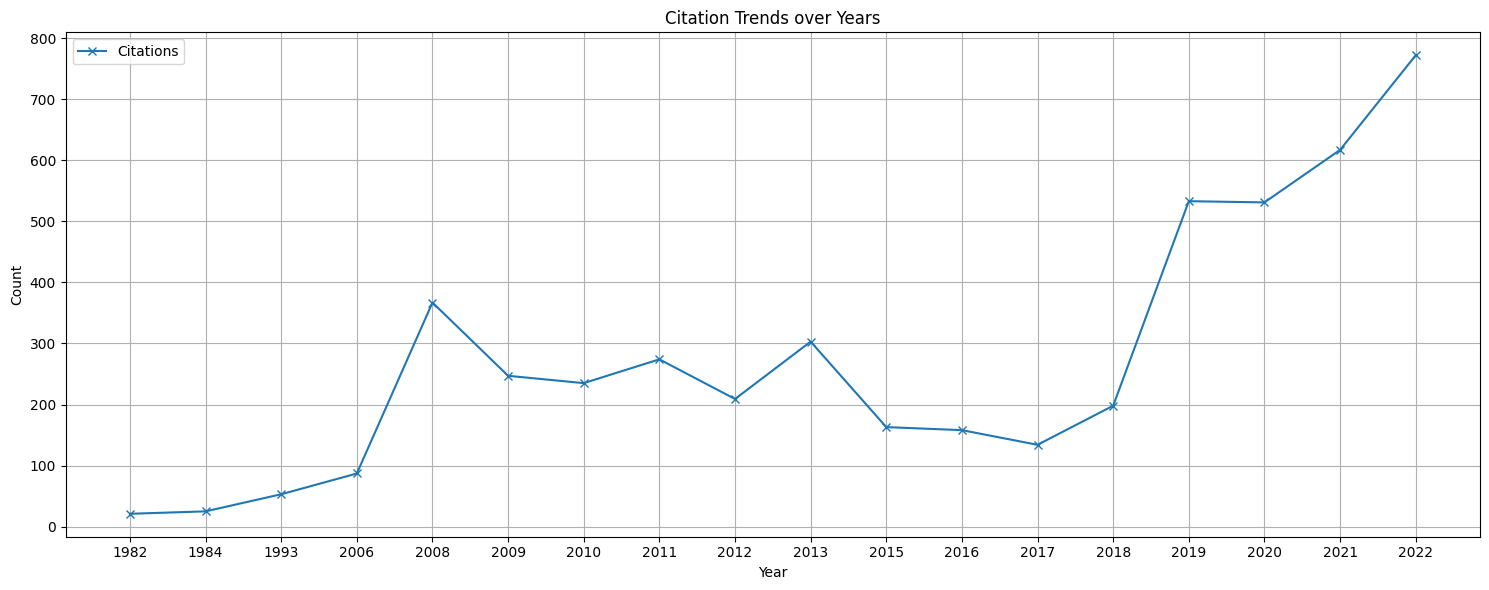

In [54]:
from collections import defaultdict
import matplotlib.pyplot as plt

# According to the citation data provided, the number of citations per year is counted
year_to_citations = defaultdict(int)
for pmid, citations in citation_data.items():
    for citation in citations:
        year = citation.get('creation')
        if year:
            year_to_citations[year] += 1

# 3. Trend mapping
years = sorted(set(year_to_publications.keys()) | set(year_to_citations.keys()))
citation_counts = [year_to_citations[year] for year in years]

plt.figure(figsize=(15, 6))
plt.plot(years, citation_counts, label="Citations", marker='x')
plt.title("Citation Trends over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The number of annual citations for articles was relatively low from 1982 to 2012, but there were several notable increases in the intervening years, most notably in 2008.

From 2012 to 2022, the number of annual citations of articles showed a rapid growth trend, with 2022 reaching a peak.

The number of citations in 2019, 2020 and 2021 is also relatively high, which may mean that research in recent years has received more attention in this field.


## Publication quantity analysis

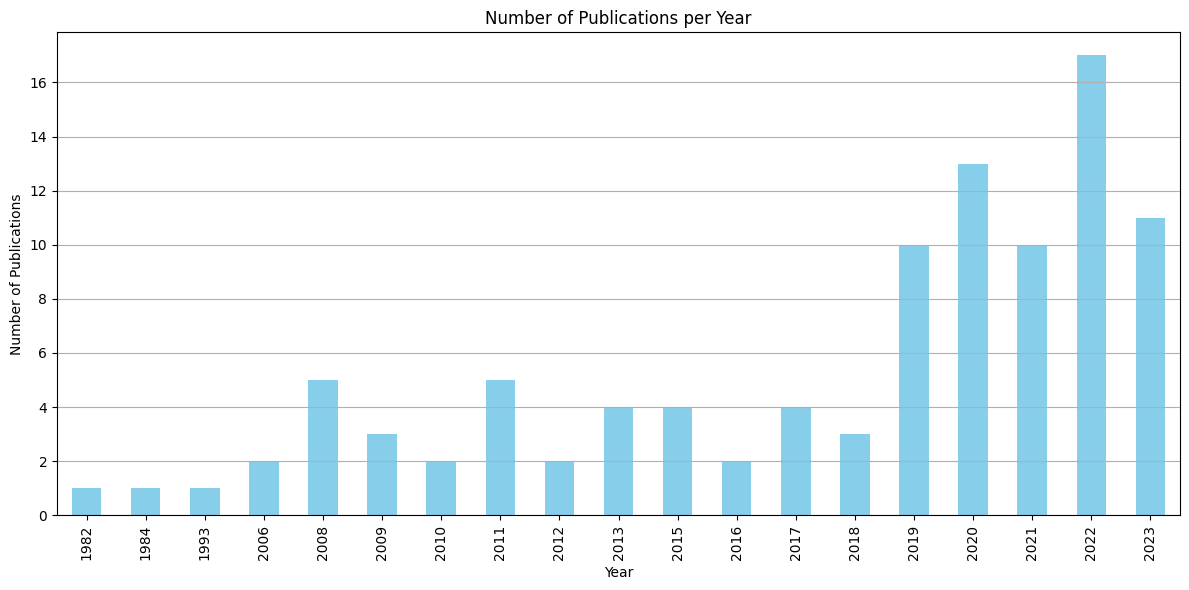

In [65]:
df = pd.read_csv("E:/Chrome download/csv-deepbrain-set.csv")

yearly_publications = df['Publication Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
yearly_publications.plot(kind='bar', color='skyblue')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In line with the trend of cited literature, it can be seen that the field of deep brain is becoming more and more popular

## Cooperative network analysis
Build a cooperation network. Each author is a node, and the cooperative relationship between two authors is an edge. Counting the number of collaborations between each pair of authors and representing those partnerships in the network helps identify the most active research teams or individuals within the field.

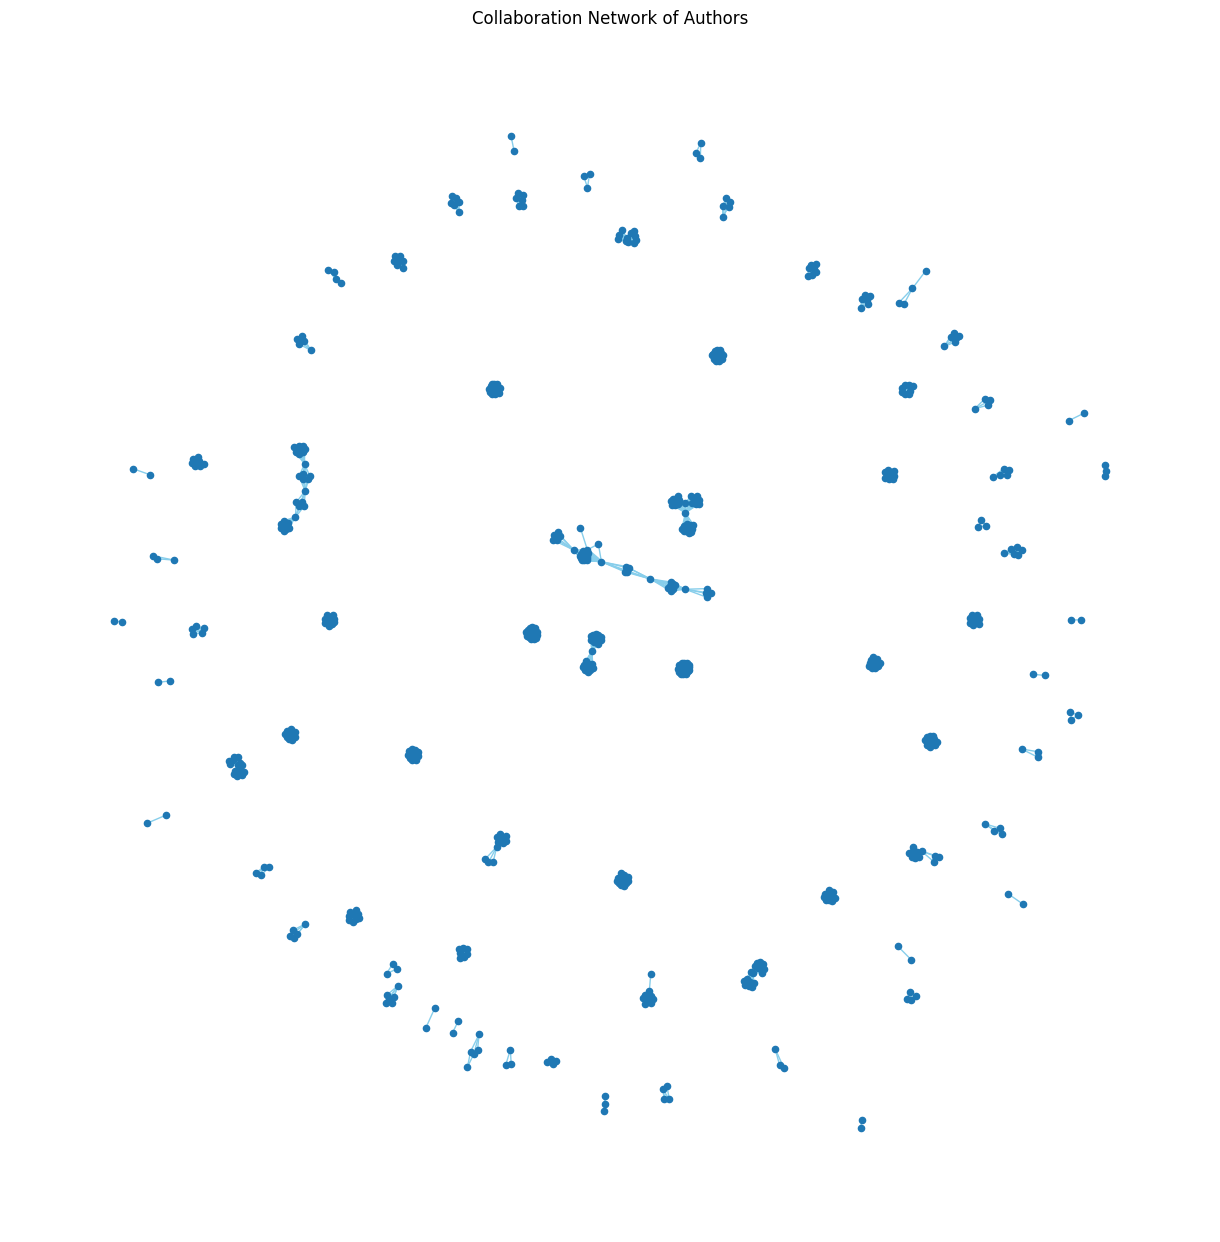

In [76]:
G = nx.Graph()

for authors in df['Authors'].dropna():
    authors_list = authors.split(', ')
    for i, author1 in enumerate(authors_list):
        for author2 in authors_list[i+1:]:
            # If an edge already exists between two authors, increase the weight of this edge; Otherwise, add a new edge
            if G.has_edge(author1, author2):
                G[author1][author2]['weight'] += 1
            else:
                G.add_edge(author1, author2, weight=1)

# Plot the network using the weights of the edges (i.e. the number of cooperations) as the width of the edges
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)  
weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G, pos, with_labels=False, node_size=20, width=weights, edge_color='skyblue')
plt.title('Collaboration Network of Authors')
plt.show()

Optimize the display

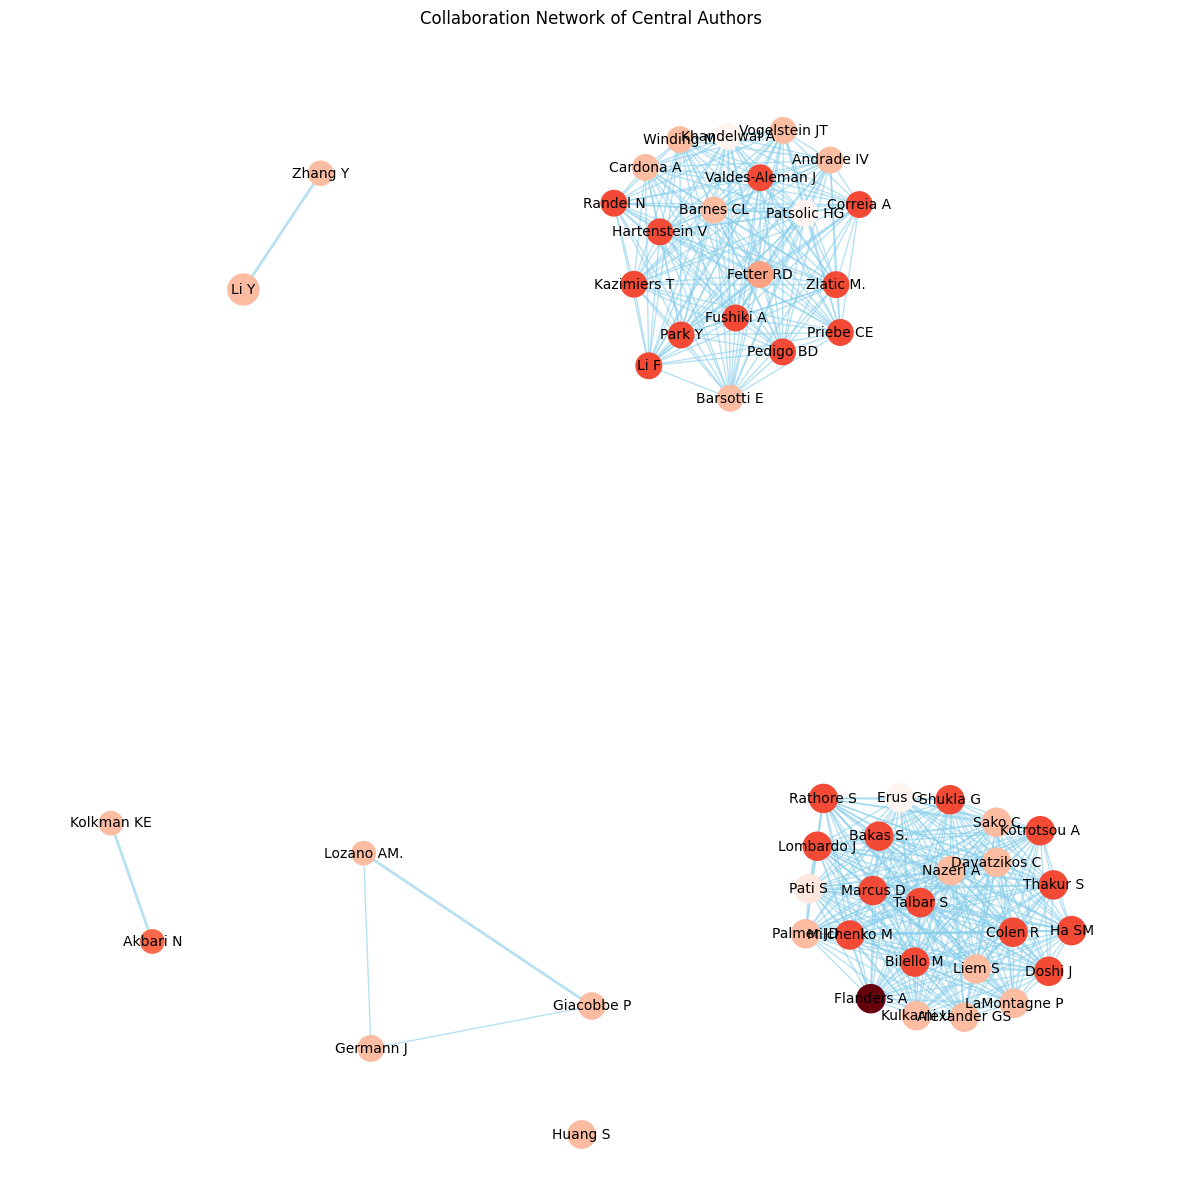

In [83]:
import numpy as np

# Calculate the centrality of each node
centrality = nx.degree_centrality(G)
central_authors = {node: centrality[node] for node in G.nodes() if centrality[node] > np.percentile(list(centrality.values()), 90)}

# Create a subgraph that contains only nodes whose centrality is above the 90th percentile
H = G.subgraph(central_authors.keys())

# Set the node size and edge width
node_sizes = [10000 * centrality[node] for node in H.nodes()]
edge_widths = [H[u][v]['weight'] for u,v in H.edges()]

plt.figure(figsize=(15,15))
pos = nx.spring_layout(H, k=0.8)  
nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color=list(central_authors.values()), cmap=plt.cm.Reds)
nx.draw_networkx_edges(H, pos, width=edge_widths, edge_color='skyblue', alpha=0.6)
nx.draw_networkx_labels(H, pos, font_size=10)
plt.title('Collaboration Network of Central Authors')
plt.axis('off')
plt.show()


Conclusion: 
1. Color shade: The color of the node is based on centrality, the darker the color indicates that the author has collaborated with other authors more often, that is, they are the center or key person in the cooperative network. These authors may be very active in the field, collaborating with multiple research teams or individuals.



2. Node size: The size of a node is also scaled based on its centrality, so a larger node represents a higher centrality of the author.



3. Edge thickness: The width of the edge indicates the number of collaborations between two authors. Thicker edges mean more cooperation between them.



4. Isolated nodes: If some nodes are relatively isolated from the main network or connected to few other nodes, this may indicate that these authors have less collaboration with the main group.